# Data Preparation

Data Preparation will basically deal with following steps
1. **Preprocess the data**:
   - Encode categorical variables.
   - Normalize numerical features.
2. **Split the data** into training and testing sets.
    - The training and testing set will be dumped into 2 files inside the data folder in-order to be consumed later on in the next step

In [ ]:
# Make a copy of the dataset for preprocessing
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load the provided dataset
file_path = '../data/bank-additional.csv'
data = pd.read_csv(file_path, delimiter=';')  # The file appears to use ';' as a delimiter

# Split the features into numerical and categorical
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous',
                      'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical_features = ['job', 'marital', 'education', 'default', 'housing',
                        'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Define categorical and numerical features
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 
                      'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 
                        'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Split categorical features into low and high cardinality
low_cardinality_categoricals = [col for col in categorical_features if data[col].nunique() <= 4]
high_cardinality_categoricals = [col for col in categorical_features if col not in low_cardinality_categoricals]

# Initialize encoders and scaler
one_hot_encoder = OneHotEncoder(drop='if_binary', sparse_output=False)
label_encoder = LabelEncoder()
scaler = StandardScaler()

# OneHotEncode low cardinality categorical features
low_card_encoded = pd.DataFrame(one_hot_encoder.fit_transform(data[low_cardinality_categoricals]),
                                columns=one_hot_encoder.get_feature_names_out(low_cardinality_categoricals),
                                index=data.index)

# LabelEncode high cardinality categorical features
high_card_encoded = data[high_cardinality_categoricals].apply(label_encoder.fit_transform)

# Scale numerical features
scaled_numerical = pd.DataFrame(scaler.fit_transform(data[numerical_features]),
                                columns=numerical_features, index=data.index)

# Combine all preprocessed features with the target variable
preprocessed_data = pd.concat([scaled_numerical, low_card_encoded, high_card_encoded, data['y']], axis=1)

# Display the first few rows of the preprocessed dataset
preprocessed_data.head()


# Train-test split
# Splitting the data into training and test sets
X = preprocessed_data.drop(columns=['y'])
y = preprocessed_data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Save the training and test data to CSV files
X_train.to_csv('../data/X_train.csv', index=False)
X_test.to_csv('../data/X_test.csv', index=False)
y_train.to_csv('../data/y_train.csv', index=False)
y_test.to_csv('../data/y_test.csv', index=False)

# Display the preprocessed data overview
preprocessed_data.info(), X_train.shape, X_test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   4119 non-null   float64
 1   duration              4119 non-null   float64
 2   campaign              4119 non-null   float64
 3   pdays                 4119 non-null   float64
 4   previous              4119 non-null   float64
 5   emp.var.rate          4119 non-null   float64
 6   cons.price.idx        4119 non-null   float64
 7   cons.conf.idx         4119 non-null   float64
 8   euribor3m             4119 non-null   float64
 9   nr.employed           4119 non-null   float64
 10  marital_divorced      4119 non-null   float64
 11  marital_married       4119 non-null   float64
 12  marital_single        4119 non-null   float64
 13  marital_unknown       4119 non-null   float64
 14  default_no            4119 non-null   float64
 15  default_unknown      

(None, (2883, 31), (1236, 31))

In [5]:
preprocessed_data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,loan_yes,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,job,education,month,day_of_week,y
0,-0.980752,0.903952,-0.209228,0.201031,-0.351356,-1.206054,-1.185448,-1.240939,-1.331707,-0.914779,...,0.0,0.0,0.0,1.0,0.0,1,2,6,0,no
1,-0.107991,0.350300,0.569634,0.201031,-0.351356,0.649441,0.715193,0.892269,0.711698,0.332862,...,0.0,1.0,0.0,1.0,0.0,7,3,6,0,no
2,-1.465619,-0.116966,-0.598660,0.201031,-0.351356,0.841389,1.528273,-0.283172,0.773427,0.836535,...,0.0,1.0,0.0,1.0,0.0,7,3,4,4,no
3,-0.204965,-0.941553,0.180203,0.201031,-0.351356,0.841389,1.528273,-0.283172,0.771697,0.836535,...,0.0,1.0,0.0,1.0,0.0,7,2,4,0,no
4,0.667795,-0.780563,-0.598660,0.201031,-0.351356,-0.118350,-0.655478,-0.326707,0.328632,0.398028,...,0.0,0.0,0.0,1.0,0.0,0,6,7,1,no


Here's a summary of the steps:

1. **Low Cardinality Categorical Features**:
   - Used **OneHotEncoding** with `drop='if_binary'` to reduce the number of columns.

2. **High Cardinality Categorical Features**:
   - Encoded with **LabelEncoder**.

3. **Numerical Features**:
   - Scaled using **StandardScaler**.

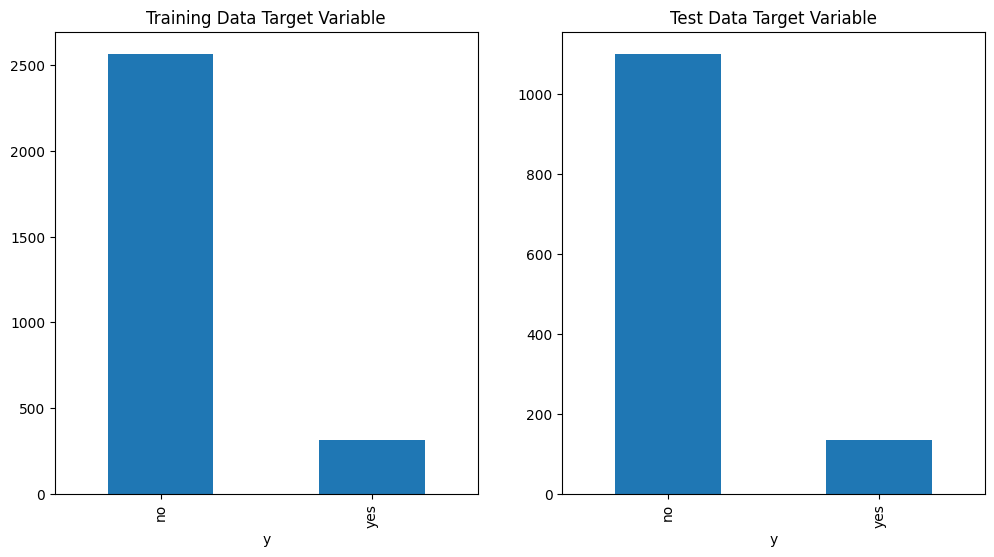

In [7]:
# plot the bar chart of the target variable in test and training data
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
y_train.value_counts().plot(kind='bar', ax=ax[0], title='Training Data Target Variable')
y_test.value_counts().plot(kind='bar', ax=ax[1], title='Test Data Target Variable')
plt.show()

# Next Step

[Link to Data Modelling and Evaluation Notebook](./04_DataModellingAndEvaluation.ipynb)